# EDA for movie box-office capstone project #
#### Amin Khoeini

***

__Goal of this projet :__

To perdict the box-office of a movie based on the rating on the popular website. Data are gathered from these website:

- Rotten Tomato
- Metacritic
- IMDB


These data has a diffrent features as below :

- Rotten Tomato categorize to :
    * 1 - Tomato meter rating, which is a reating given by critic: critice vote average called __tom_cri_vote__ and critice vote number called __tom_cri_num__.
    * 2 - Tomato audience rating: audience vote average called __tom_aud_vote__ and audience vote number called __tom_aud_num__.


- Metacritic, categorize to.
    * 1 - Metacritic rating, which is a reating given by critics: critice vote average called __met_cri_vote__ and critice vote number called __met_cri_num__.
    * 2 - Metacritic audience rating: audience vote average called __met_aud_vote__ and audience vote number called __met_aud_num__.
    
- IMDB categorize to :

    * 1 - Total vote: Imdb vote average which called __imdb_vote__ and number of vote which called __imdb_num__.
    * 2 - USA vote: Usa user vote average which called __imdb_us_vote__ and Usa vote number which called __imdb_us_num__.
    * 3 - Non-USA vote: None Usa user vote average which called __imdb_nus_vote__ and None Usa vote number which called __imdb_nus_num__.
    * 4 - Female vote: Female user vote average which called __imdb_fem_vote__ and Female vote number which called __imdb_fem_num__.
    * 5 - Male vote: male user vote average which called __imdb_mel_vote__ and Male vote number which called __imdb_mel_num__.
    
    



__The dependnat value__ here is the movie box-office gross that this project tries to make a model to predict it.It has a three diffrent value of Domestic,International and Lifetime which is the sum of the first two.







### 1: General Information about dataset: 

__Loading the data and import packages__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as pltc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
movie = pd.read_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/movie_db_fianl1.csv')


In [3]:
movie.head(3)

Unnamed: 0                                        Title  \
0           0                      The Mountain Between Us   
1           1                                      Rampage   
2           2  Valerian and the City of a Thousand Planets   

                                   Alternative Title        director  Year  \
0                               Il domani tra di noi  Hany Abu-Assad  2017   
1                             Rampage: Furia animale     Brad Peyton  2018   
2  Valerian e la cittÀ_À__À_À__ dei mille pia...      Luc Besson  2017   

  date_published  All_time_gross  Domestic_Lifetime_Gross  \
0     2017-11-23        62832209                 30348555   
1     2018-04-12       428028233                101028233   
2     2017-09-21       225973340                 41189488   

   Foreign_Lifetime_Gross  tom_cri_vote  ...  imdb_vote  imdb_num  \
0                32483654            38  ...         64     64703   
1               327000000            51  ...         61    137865   
2               184783852            48  ...         65    157560   

   imdb_us_vote  imdb_us_num  imdb_nus_vote  imdb_nus_num  imdb_fem_vote  \
0            64         7520             63         27997             67   
1            61        17163             60         54731             64   
2            63        17690             64         69287             64   

   imdb_fem_num  imdb_mal_vote  imdb_mal_num  
0         13462             63         35093  
1         13702             60         84286  
2         18118             65         99701  

[3 rows x 27 columns]

#### There are some columns that are not related to modeling and we can saftly drop them from the dataset. ( such as title,director,etc.)

In [4]:
### the information about the movies are not valuable for the modeling so we drop those columns###

movie.drop(columns=['Unnamed: 0','Title','Alternative Title','director','Year','date_published'],inplace=True)






#### Now use the describe and info method to make sure all the data is in accepted range, and there is no null value in the dataset.







In [5]:
movie.describe().T

count          mean           std    min        25%  \
All_time_gross           3276.0  7.193749e+07  1.885635e+08  177.0  223421.25   
Domestic_Lifetime_Gross  3276.0  2.790908e+07  6.852202e+07    0.0   11098.25   
Foreign_Lifetime_Gross   3276.0  4.407905e+07  1.250703e+08    0.0   75990.25   
tom_cri_vote             3276.0  5.819109e+01  2.770101e+01    0.0      35.75   
tom_cri_num              3276.0  1.117399e+02  9.645764e+01    3.0      32.00   
tom_aud_vote             3276.0  5.586661e+01  2.005696e+01    0.0      41.00   
tom_aud_num              3276.0  3.014552e+04  7.897836e+04    0.0     500.00   
met_cri_vote             3276.0  5.525672e+01  1.751673e+01    1.0      42.00   
met_cri_num              3276.0  2.348932e+01  1.389440e+01    2.0      11.00   
met_aud_vote             3276.0  6.178388e+01  1.367486e+01    0.0      54.00   
met_aud_num              3276.0  1.952283e+02  5.249771e+02    2.0      11.00   
imdb_vote                3276.0  6.234585e+01  8.989105e+00   21.0      57.00   
imdb_num                 3276.0  6.832832e+04  1.351789e+05  100.0    3687.00   
imdb_us_vote             3276.0  6.255983e+01  9.082779e+00   15.0      57.00   
imdb_us_num              3276.0  8.907374e+03  1.646556e+04   13.0     587.75   
imdb_nus_vote            3276.0  6.150305e+01  9.151298e+00   19.0      56.00   
imdb_nus_num             3276.0  3.011492e+04  5.598856e+04   25.0    1674.00   
imdb_fem_vote            3276.0  6.361477e+01  8.845266e+00   26.0      58.00   
imdb_fem_num             3276.0  1.063012e+04  2.008988e+04   12.0     562.50   
imdb_mal_vote            3276.0  6.176007e+01  9.182649e+00   21.0      56.00   
imdb_mal_num             3276.0  4.193603e+04  8.278591e+04   61.0    2168.75   

                               50%          75%           max  
All_time_gross           3471091.0  49051361.25  2.797501e+09  
Domestic_Lifetime_Gross   511080.5  25108877.00  9.366622e+08  
Foreign_Lifetime_Gross   1613171.0  22015993.00  1.939128e+09  
tom_cri_vote                  63.0        83.00  1.000000e+02  
tom_cri_num                   83.0       168.00  5.740000e+02  
tom_aud_vote                  56.0        72.00  1.000000e+02  
tom_aud_num                 4467.0     25996.50  2.374219e+06  
met_cri_vote                  56.0        68.00  1.000000e+02  
met_cri_num                   22.0        35.00  6.200000e+01  
met_aud_vote                  64.0        71.00  9.400000e+01  
met_aud_num                   40.0       164.00  9.978000e+03  
imdb_vote                     63.0        68.00  8.800000e+01  
imdb_num                   16294.5     70514.50  2.002816e+06  
imdb_us_vote                  63.0        69.00  9.400000e+01  
imdb_us_num                 2387.0      9778.25  2.467180e+05  
imdb_nus_vote                 62.0        68.00  8.700000e+01  
imdb_nus_num                7622.5     32859.25  7.994200e+05  
imdb_fem_vote                 64.0        70.00  9.200000e+01  
imdb_fem_num                2678.0     11409.00  2.789640e+05  
imdb_mal_vote                 62.0        68.00  8.800000e+01  
imdb_mal_num                9839.5     42147.00  1.202678e+06

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   All_time_gross           3276 non-null   int64
 1   Domestic_Lifetime_Gross  3276 non-null   int64
 2   Foreign_Lifetime_Gross   3276 non-null   int64
 3   tom_cri_vote             3276 non-null   int64
 4   tom_cri_num              3276 non-null   int64
 5   tom_aud_vote             3276 non-null   int64
 6   tom_aud_num              3276 non-null   int64
 7   met_cri_vote             3276 non-null   int64
 8   met_cri_num              3276 non-null   int64
 9   met_aud_vote             3276 non-null   int64
 10  met_aud_num              3276 non-null   int64
 11  imdb_vote                3276 non-null   int64
 12  imdb_num                 3276 non-null   int64
 13  imdb_us_vote             3276 non-null   int64
 14  imdb_us_num              3276 non-null   int64
 15  imdb

#### Seems all the data are clean and have a proper type. 


### 2.Dependant Value : box-office gross
***

let's take a look at the three columns that represent the box-office information for the movies.

In [7]:
movie['All_time_gross'].value_counts(sort=True)

491154       4
61105744     4
532950503    4
840809       3
1696330      3
            ..
100581       1
243711       1
63828        1
130974       1
21626        1
Name: All_time_gross, Length: 3170, dtype: int64

In [8]:
movie['Domestic_Lifetime_Gross'].value_counts(sort=True)

0            591
183637894      4
12139          4
45896028       4
83911193       2
            ... 
49876377       1
39046489       1
17630465       1
26167002       1
21626          1
Name: Domestic_Lifetime_Gross, Length: 2605, dtype: int64

In [9]:
movie['Foreign_Lifetime_Gross'].value_counts(sort=True)

0            447
479015         4
349312609      4
15209716       4
840809         3
            ... 
15698671       1
8761863        1
410774         1
1378160        1
5455502        1
Name: Foreign_Lifetime_Gross, Length: 2737, dtype: int64

It is obvious that __Domestic gross__ and __Foreign gross__ have lots of the row with zero value. The Worldwide alltime is a sum of these two number and has value for all of the rows. So for the sake of these project let's focus on __Worldwide Lifetime__ as the dependant value and drop the other two.

In [10]:
movie.drop(columns=['Domestic_Lifetime_Gross','Foreign_Lifetime_Gross'],inplace=True)

__Take a quick look at the dependant value.__

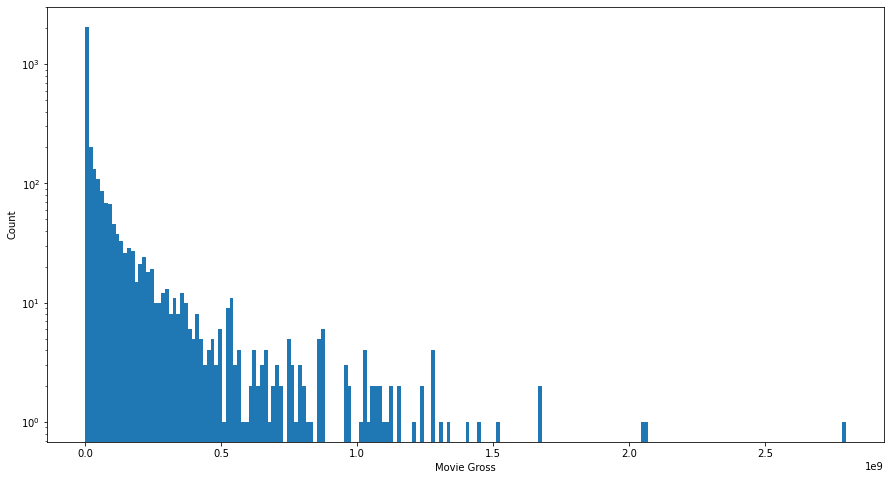

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
_ = ax.hist(movie.All_time_gross,bins=200,label='movie gross')
_ = ax.set_yscale('log')
_ = ax.set_ylabel('Count')
_ = ax.set_xlabel('Movie Gross')

#### The Lifetime gross has a large range of value. Let's make a loose 3 category to better visualize the distribution of this data.


- Blockbuster : Movie with gross more than 250 million dollars.
- Average : Movie with the gross between 250 million and 25 million dollars.
- Indie : Movie with the gross less than 25 million dollars.


In [12]:
def conditions(df):
    if (df.All_time_gross > 250000000):
        return 'Blockbuster'
    elif ( df.All_time_gross < 25000000):
        return 'Indie'
    else:
        return 'Average'

movie['class'] = movie.apply(conditions, axis=1) 

Now let's see the __distrubution of the class__ throughout the data.

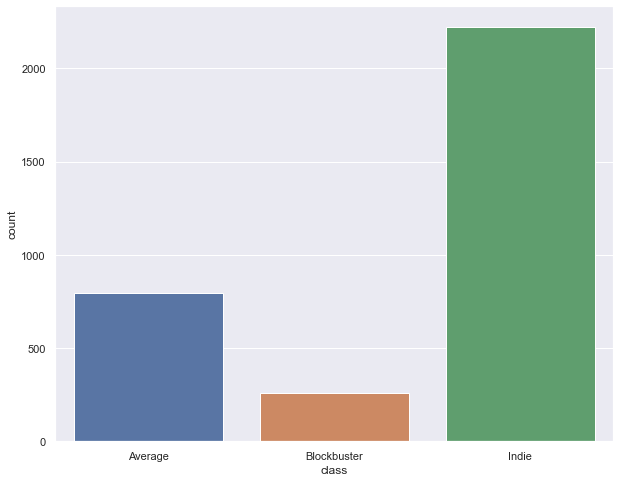

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
_ = sns.countplot(x='class',data=movie)

Seems most of the data belong to the Indie class with box-office gross of 2,000,000 dollars or less.

To see the __relationship__ between the __dependant value__ and all the __predictor variable__ ,let's make a scatterplot and use the class for better visualazation.

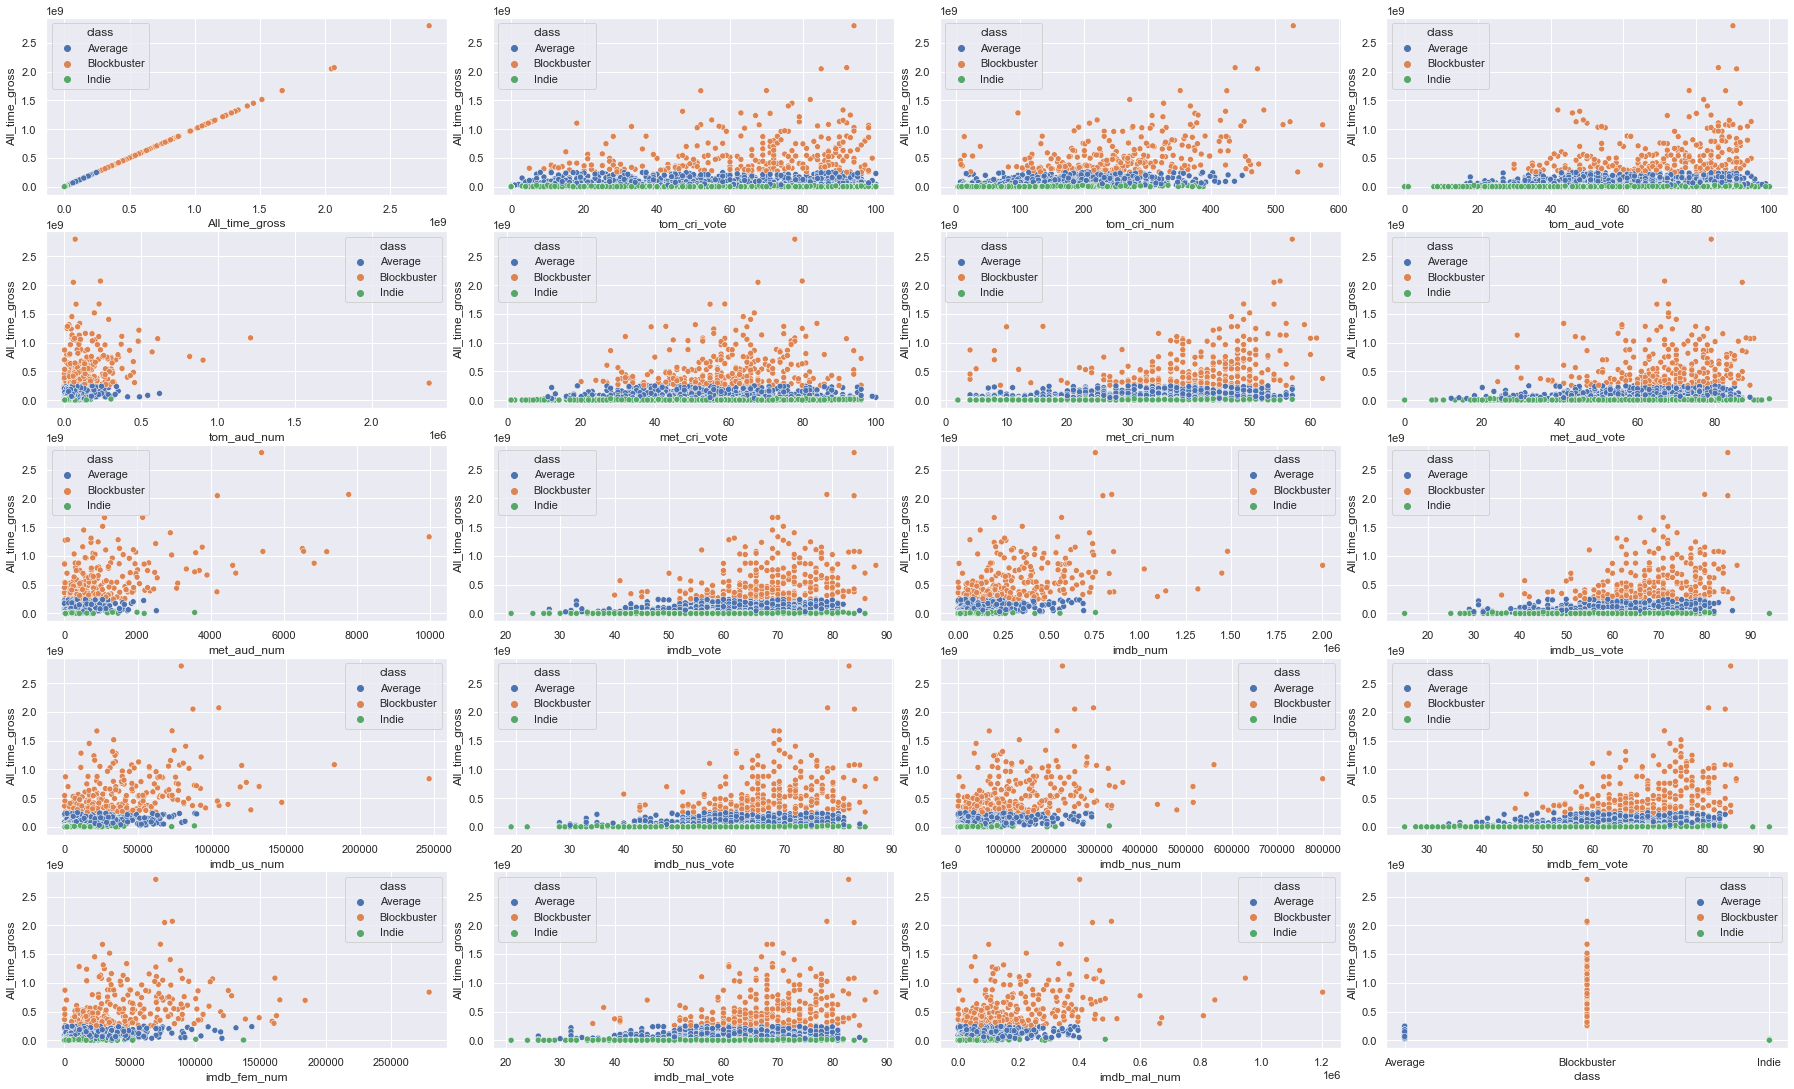

In [14]:
col = movie.columns
col.drop('class')
fig, axes = plt.subplots(5,4, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(col, axes.flat):
         _ = sns.scatterplot(ax=ax,x=i,y= 'All_time_gross',data=movie,hue='class')

This figures shows most of the __votes count__ columns has a __positive and linear__ connection with __the movie gross__ variable. But we don't see this pattern with the average vote values columns in the dataset.

### 3. Predictor variable

***

First let's check the distribution of the __average vote__ for the diffrent source and see how each class contributes.

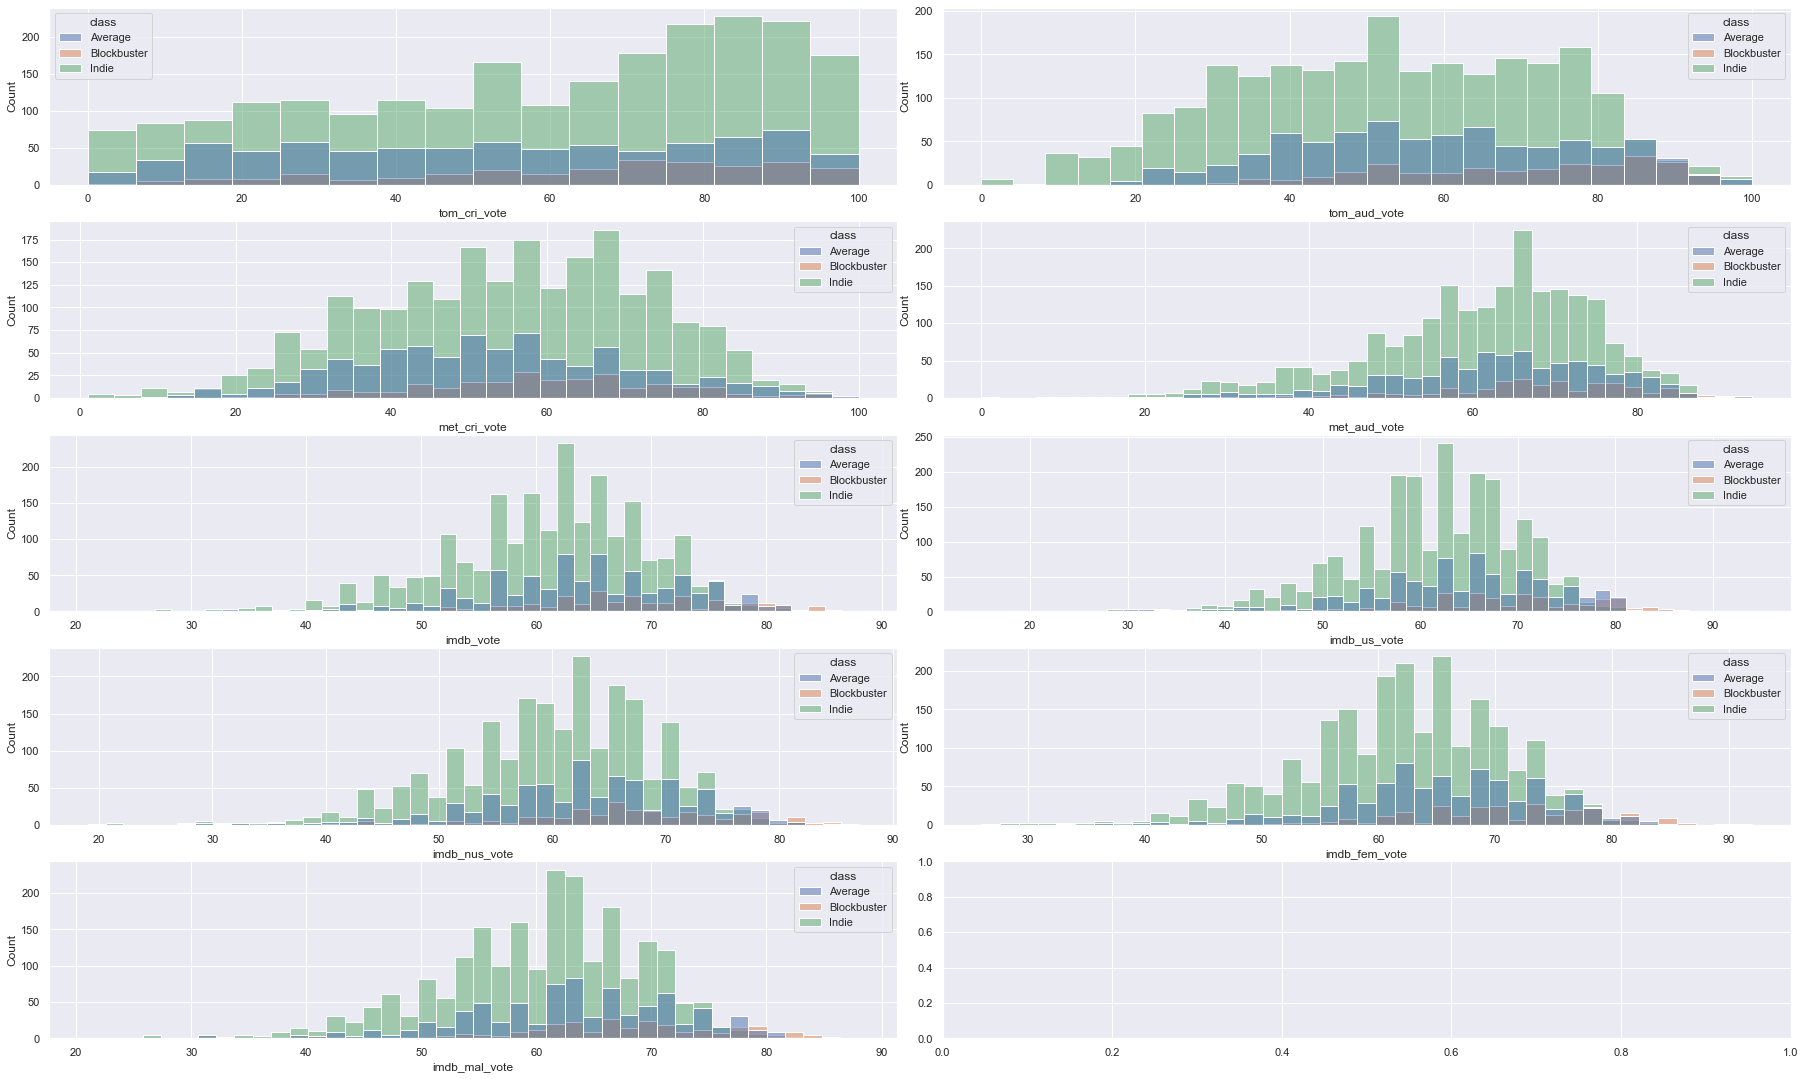

In [15]:
columns = movie[['tom_cri_vote', 'tom_aud_vote','met_cri_vote', 'met_aud_vote', 'imdb_vote', 'imdb_us_vote', 'imdb_nus_vote',
                   'imdb_fem_vote', 'imdb_mal_vote']].columns
fig, axes = plt.subplots(5,2, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(columns, axes.flat):
         _ = sns.histplot(ax=ax,x=i,data=movie,hue='class')

While the distribution of average vote for __Indie and Avarage__ movies are __widespread__, __Blockbuster__ tends to have a __higher than average__ vote ( 70 and higher).

__Metacretic__ shows a very __diffrent distribution__ shape in compare to others. While others are all somehome have a normalized distribution, Metacritic has a left tail and high number of Indie films shows a high vote values.

Now we can make a __scaterplot of average vote with the number of vote__ for each data and see thier pattern.

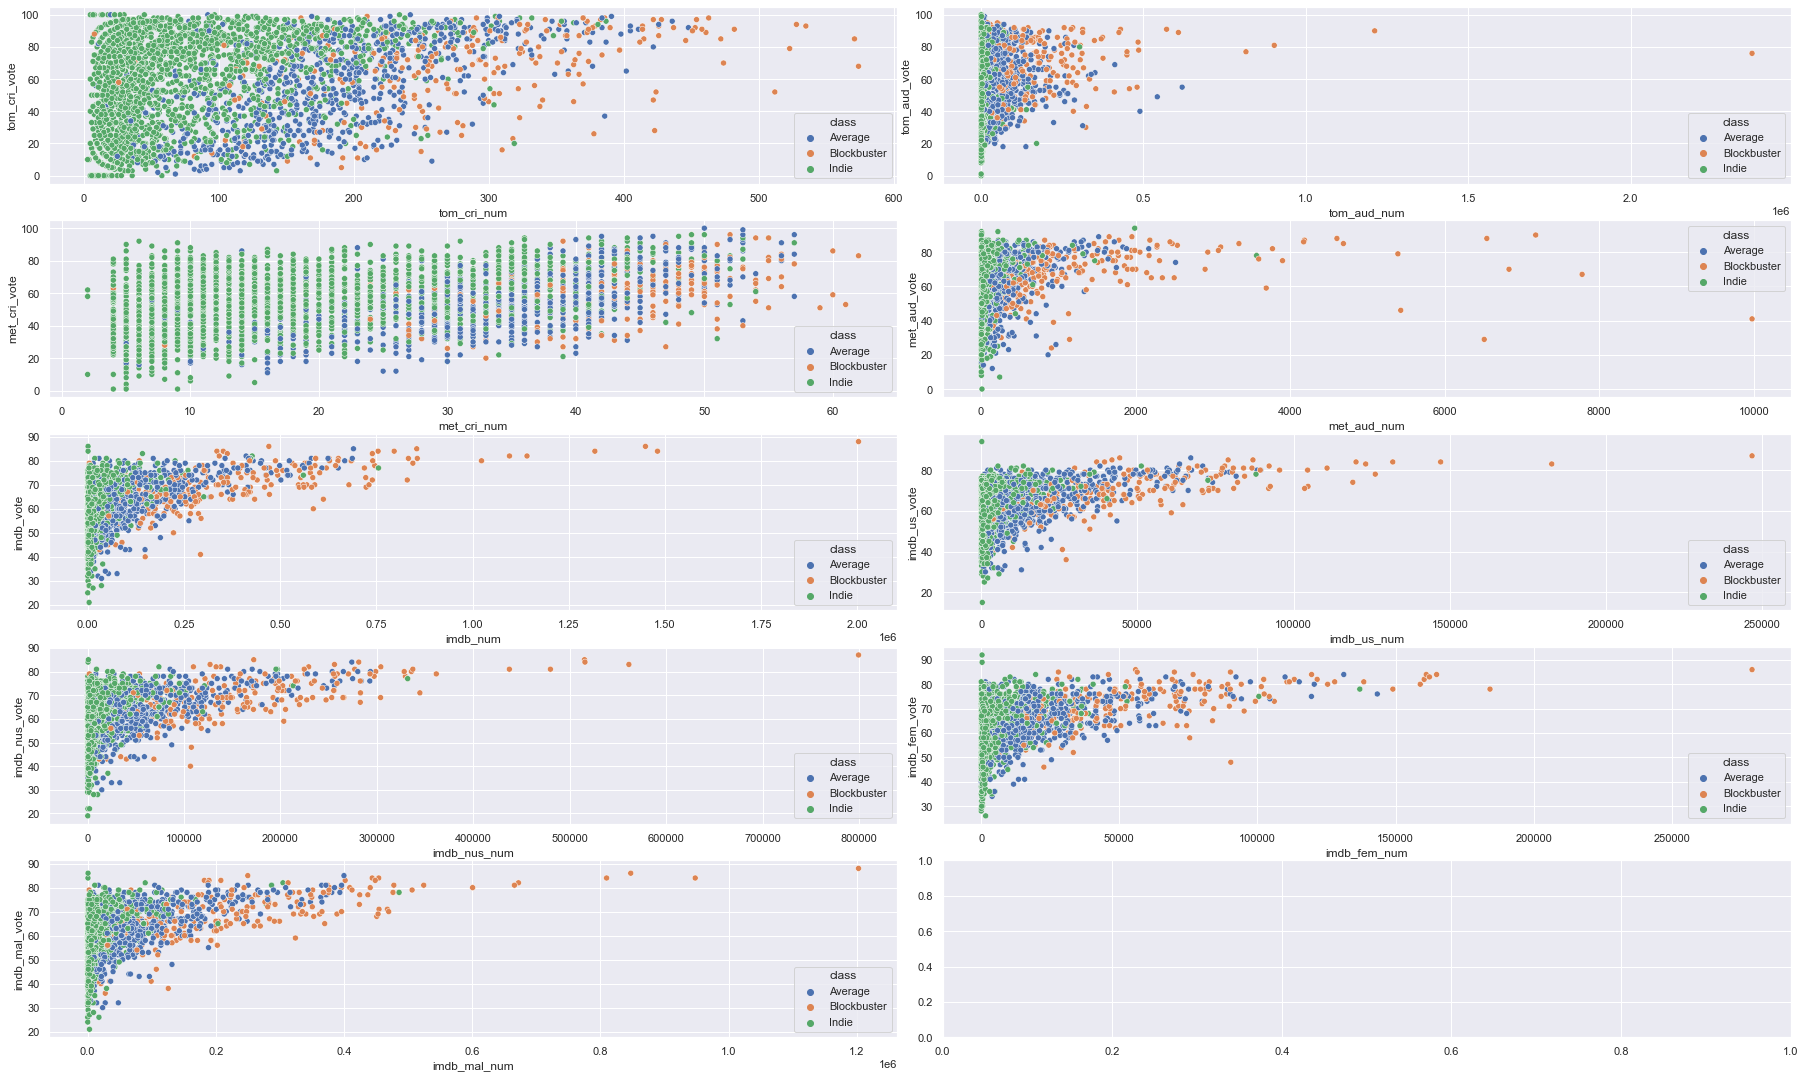

In [16]:
fig, axes = plt.subplots(5,2, figsize=(25,15))
fig.tight_layout()
_ = sns.scatterplot(ax=axes[0,0],y='tom_cri_vote',x= 'tom_cri_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[0,1],y='tom_aud_vote',x= 'tom_aud_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[1,0],y='met_cri_vote',x= 'met_cri_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[1,1],y='met_aud_vote',x= 'met_aud_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[2,0],y='imdb_vote',x= 'imdb_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[2,1],y='imdb_us_vote',x= 'imdb_us_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[3,0],y='imdb_nus_vote',x= 'imdb_nus_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[3,1],y='imdb_fem_vote',x= 'imdb_fem_num',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[4,0],y='imdb_mal_vote',x= 'imdb_mal_num',data=movie,hue='class')

As we expected __Indie__ movies are less popular, they have less number of vote in all the cases, but they have all the range of the average vote from very low to almost 100. __Blockbuster__ on the other hands have very high number of votes and the average vote of 70 or higher.

Another __interesting observation__ from this plot is  __votes that gathered from critic have a distinctive diffrent distribution compare to audience vote__. From the two graphs that relate to critics vote we see that __critic tends to give a high number (60 or above) to Indie films__. Also there are a large number of high vote for indie film from critics, while audience tends to gives a high vote to popular Blockboster movie and Inide film has very low number of high vote average.

The two critics graph also shows some diffrences between how critics vote on Rotten Tomatto and Metacritic website.
__Rotten Tomatto seems more popular amoung the critics, it shows 10 times more vote in compare to Metacritic.__


### 4.Critics Vs Audience

There is clearly a diffrent distribution of vote between critic and audience. Let's take a deeper look at this diffrence.

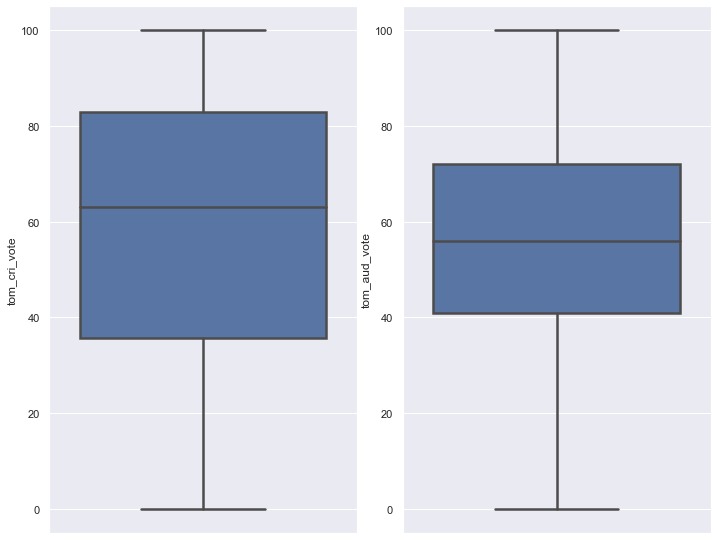

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'tom_cri_vote',data=movie,linewidth=2.5)
_ = sns.boxplot(ax=axes[1],y= 'tom_aud_vote',data=movie,linewidth=2.5)

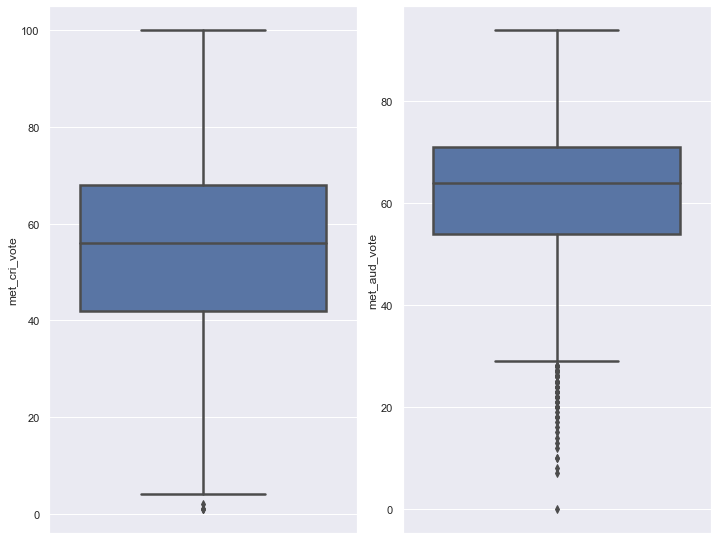

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'met_cri_vote',data=movie,linewidth=2.5)
_ = sns.boxplot(ax=axes[1],y= 'met_aud_vote',data=movie,linewidth=2.5)

On Rotten Tomatto audience tends to vote in 40/100 - 70/100 range while critic have a broader vote from 30/100 to 85/100. Rotten Tomatto audience gives average and above avrage rating while critic have a more relaistic opinion about the movies.

Metacritic on the other hands seems have a tougher critic, thier vote range is between 40/100 to 70/100. Metacritic audience also are diffrent from Rotten Tomatto, they gave 60/100 to 80/100 to all movie beside a few outliner that have below 30/100 vote.

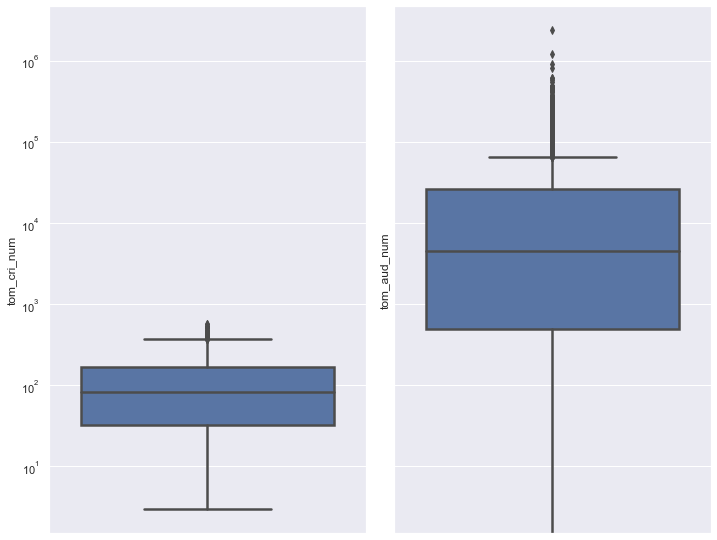

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,8),sharey=True)
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'tom_cri_num',data=movie,linewidth=2.5)
_ = sns.boxplot(ax=axes[1],y= 'tom_aud_num',data=movie,linewidth=2.5)
_ .set_yscale('log')

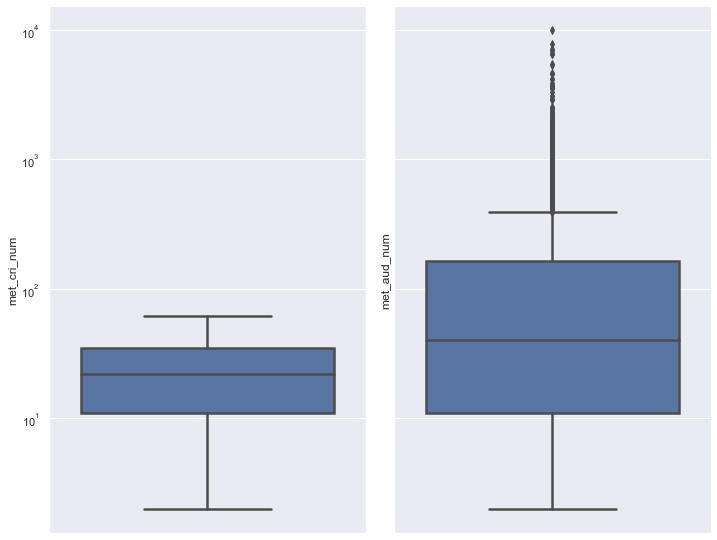

In [20]:
fig, axes = plt.subplots(1,2, figsize=(10,8),sharey=True)
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'met_cri_num',data=movie,linewidth=2.5)
_ = sns.boxplot(ax=axes[1],y= 'met_aud_num',data=movie,linewidth=2.5)
_ .set_yscale('log')

Both website have 10 times more audience vote than critic vote. Rotten Tomatto is more popular amoung the audience, its vote range is between 1000,10000 while Metacritic vote is between 100,1000. 

Imdb only gather the audience vote and it would be interesting to compare it to the audience vote of Rotten Tomatto and Metacritic.

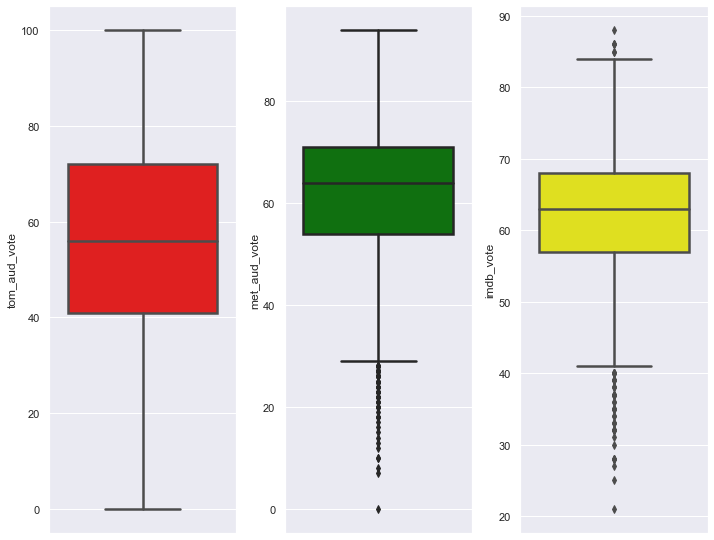

In [21]:
fig, axes = plt.subplots(1,3, figsize=(10,8))
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'tom_aud_vote',data=movie,linewidth=2.5,color='red')
_ = sns.boxplot(ax=axes[1],y= 'met_aud_vote',data=movie,linewidth=2.5,color='green')
_ = sns.boxplot(ax=axes[2],y= 'imdb_vote',data=movie,linewidth=2.5,color='yellow')

Imdb audience tends to have even smaller vote range with a few outliner in both spectrum. It's more focused around the above average range.

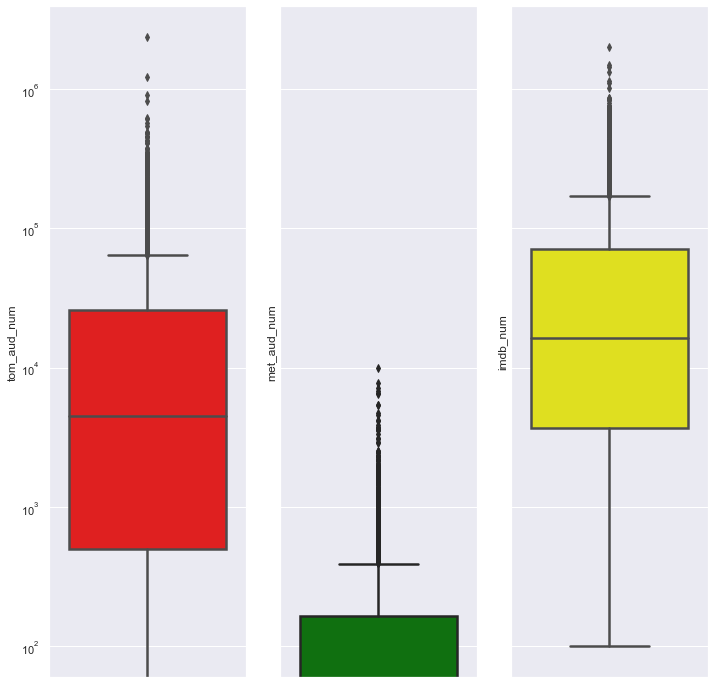

In [22]:
fig, axes = plt.subplots(1,3, figsize=(10,10),sharey=True)
fig.tight_layout()
_ = sns.boxplot(ax=axes[0],y= 'tom_aud_num',data=movie,linewidth=2.5,color='red')
_ = sns.boxplot(ax=axes[1],y= 'met_aud_num',data=movie,linewidth=2.5,color='green')
_ = sns.boxplot(ax=axes[2],y= 'imdb_num',data=movie,linewidth=2.5,color='yellow')
_ .set_yscale('log')

Imdb is even more popular between the audience than Rotten Tomatto,its vote number range is between 10,000 to 100,000.

#### Dimensionality reduction in the dataset:
To see how __diffrent predictor variable relate to eachother__ and which one is better to chose for final model, let's do the __Principal component analysis__ for these variable. doing this, we can eliminate redundant features and make a optimal model for the box-office prediction.

- First let's chose the predictor value and scale them for PCA.

In [23]:
movie1 = movie.drop(columns=['All_time_gross','class'])
columns_scale = movie1.columns
scale = StandardScaler()
movie_scale = scale.fit_transform(movie1)
movie_scale_df = pd.DataFrame(movie_scale, columns=(columns_scale))
pca = PCA()
pca.fit(movie_scale_df)
movie_PCA = pca.transform(movie_scale_df)
principalDf = pd.DataFrame({'principal component 1':movie_PCA[:,0],'principal component 2':movie_PCA[:,1]})        
finalDf = pd.concat([principalDf, movie[['class']]], axis = 1)

- Plot the cumulative variance ratio with number of components.

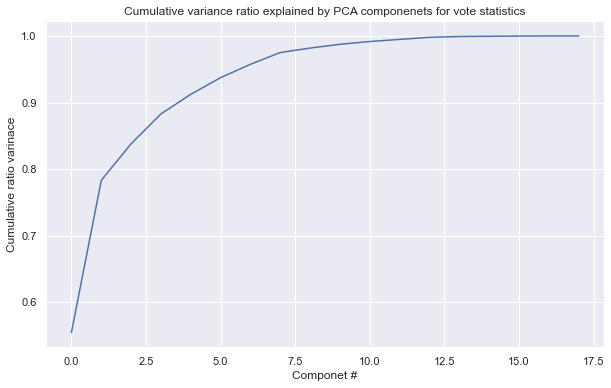

In [24]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum());
plt.xlabel('Componet #')
plt.ylabel('Cumulative ratio varinace')
plt.title('Cumulative variance ratio explained by PCA componenets for vote statistics');

The first __two components__ seem to account for __85%__ of the variance.

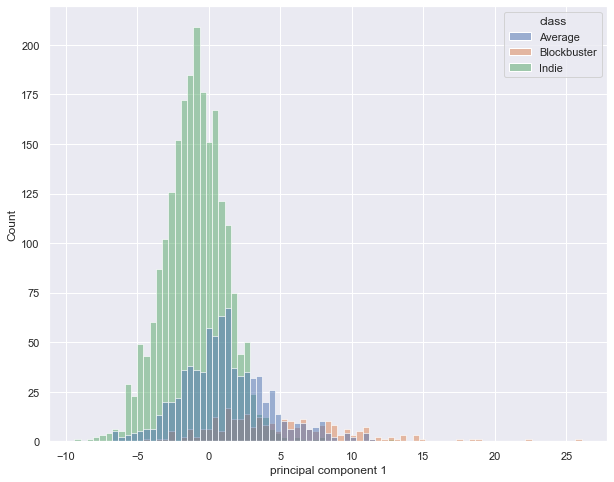

In [25]:
_ = sns.histplot(x='principal component 1',data=finalDf,hue='class')

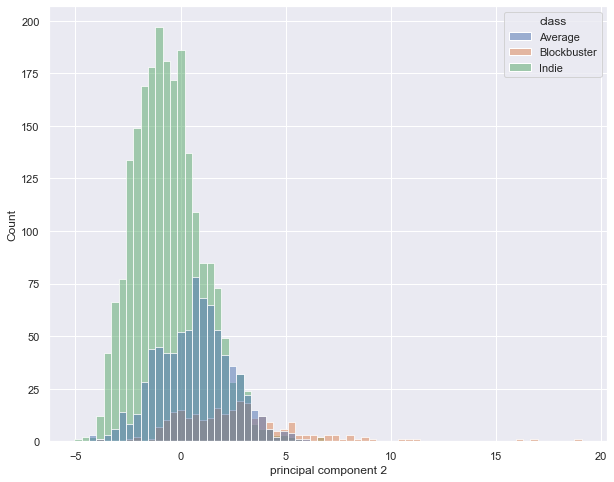

In [26]:
_ = sns.histplot(x='principal component 2',data=finalDf,hue='class')

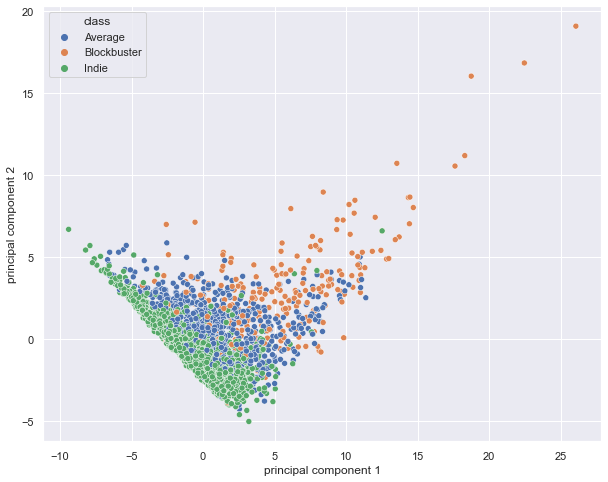

In [27]:
_ = sns.scatterplot(x='principal component 1',y='principal component 2',data=finalDf,hue='class')

This plot shows that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other. Indie class has less variation and the dots are more complex, and average and Blockbuster scatter more.

now let's plot a __heatmap__ to see the __corrolation__ between the predictor and the dependant value of the dataset.

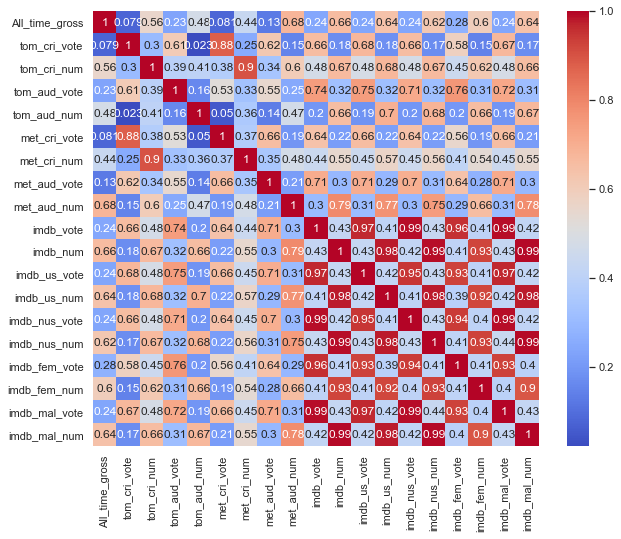

In [28]:

_ = sns.heatmap(movie.corr(),cmap='coolwarm', annot=True)

In [29]:
movie.to_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/pre_process_movie.csv',index=False)

### 5. Weighting and normalizing the vote avg with vote number:
***

Like it showed in the scatter plot the __vote avg seems has no relation with the movie gross__. let's try to see if __weighting each vote avg value with its corresponding vote count__ can make the vote avg more usable for the model.

I use the below formula for this perpose, and make a score for each data.

     score =  (vote number - vote number(min) / vote number(max) - vote number(min) ) * average vote 

In [30]:
movie_score = pd.DataFrame()
movie_score['All_time_gross'] = movie.All_time_gross
movie_score['tom_cri_score'] = ((movie.tom_cri_num-np.min(movie.tom_cri_num))/(np.max(movie.tom_cri_num)- np.min(movie.tom_cri_num))) * movie.tom_cri_vote
movie_score['tom_aud_score'] = ((movie.tom_aud_num-np.min(movie.tom_aud_num))/(np.max(movie.tom_aud_num)-np.min(movie.tom_aud_num))) * movie.tom_aud_vote
movie_score['met_cri_score'] = ((movie.met_cri_num-np.min(movie.met_cri_num))/(np.max(movie.met_cri_num)-np.min(movie.met_cri_num))) * movie.met_cri_vote
movie_score['met_aud_score'] = ((movie.met_aud_num-np.min(movie.met_aud_num))/(np.max(movie.met_aud_num)-np.min(movie.met_aud_num))) * movie.met_aud_vote
movie_score['imdb_score'] = ((movie.imdb_num-np.min(movie.imdb_num))/(np.max(movie.imdb_num)-np.min(movie.imdb_num))) * movie.imdb_vote
movie_score['imdb_us_score']=((movie.imdb_us_num-np.min(movie.imdb_us_num))/(np.max(movie.imdb_us_num)-np.min(movie.imdb_us_num))) * movie.imdb_us_vote
movie_score['imdb_nus_score']=((movie.imdb_nus_num-np.min(movie.imdb_nus_num))/(np.max(movie.imdb_nus_num)-np.min(movie.imdb_nus_num)))*movie.imdb_nus_vote
movie_score['imdb_fem_score']=((movie.imdb_fem_num-np.min(movie.imdb_fem_num))/(np.max(movie.imdb_fem_num)-np.min(movie.imdb_fem_num))) * movie.imdb_fem_vote
movie_score['imdb_mal_score'] = ((movie.imdb_mal_num-np.min(movie.imdb_mal_num))/(np.max(movie.imdb_mal_num)-np.min(movie.imdb_mal_num))) * movie.imdb_mal_vote
movie_score['class'] = movie['class']

In [31]:
movie_score.describe().T

count          mean           std    min            25%  \
All_time_gross  3276.0  7.193749e+07  1.885635e+08  177.0  223421.250000   
tom_cri_score   3276.0  1.249701e+01  1.423395e+01    0.0       2.230298   
tom_aud_score   3276.0  8.185137e-01  2.460268e+00    0.0       0.010045   
met_cri_score   3276.0  2.129538e+01  1.727440e+01    0.0       7.066667   
met_aud_score   3276.0  1.350672e+00  3.828720e+00    0.0       0.054531   
imdb_score      3276.0  2.382261e+00  5.223244e+00    0.0       0.102347   
imdb_us_score   3276.0  2.512044e+00  5.139497e+00    0.0       0.137849   
imdb_nus_score  3276.0  2.590717e+00  5.314434e+00    0.0       0.118668   
imdb_fem_score  3276.0  2.682522e+00  5.538160e+00    0.0       0.119661   
imdb_mal_score  3276.0  2.419273e+00  5.286570e+00    0.0       0.102267   

                         50%           75%           max  
All_time_gross  3.471091e+06  4.905136e+07  2.797501e+09  
tom_cri_score   7.021891e+00  1.815762e+01  8.664799e+01  
tom_aud_score   8.998959e-02  6.448805e-01  7.600000e+01  
met_cri_score   1.700000e+01  3.230000e+01  8.800000e+01  
met_aud_score   2.278970e-01  9.817061e-01  6.473937e+01  
imdb_score      4.957343e-01  2.258575e+00  8.800000e+01  
imdb_us_score   5.819906e-01  2.478241e+00  8.700000e+01  
imdb_nus_score  5.671652e-01  2.615265e+00  8.700000e+01  
imdb_fem_score  5.900872e-01  2.615517e+00  8.600000e+01  
imdb_mal_score  5.031768e-01  2.237605e+00  8.800000e+01

How about doing the same scatterplot again now with the wighted vote avg values.

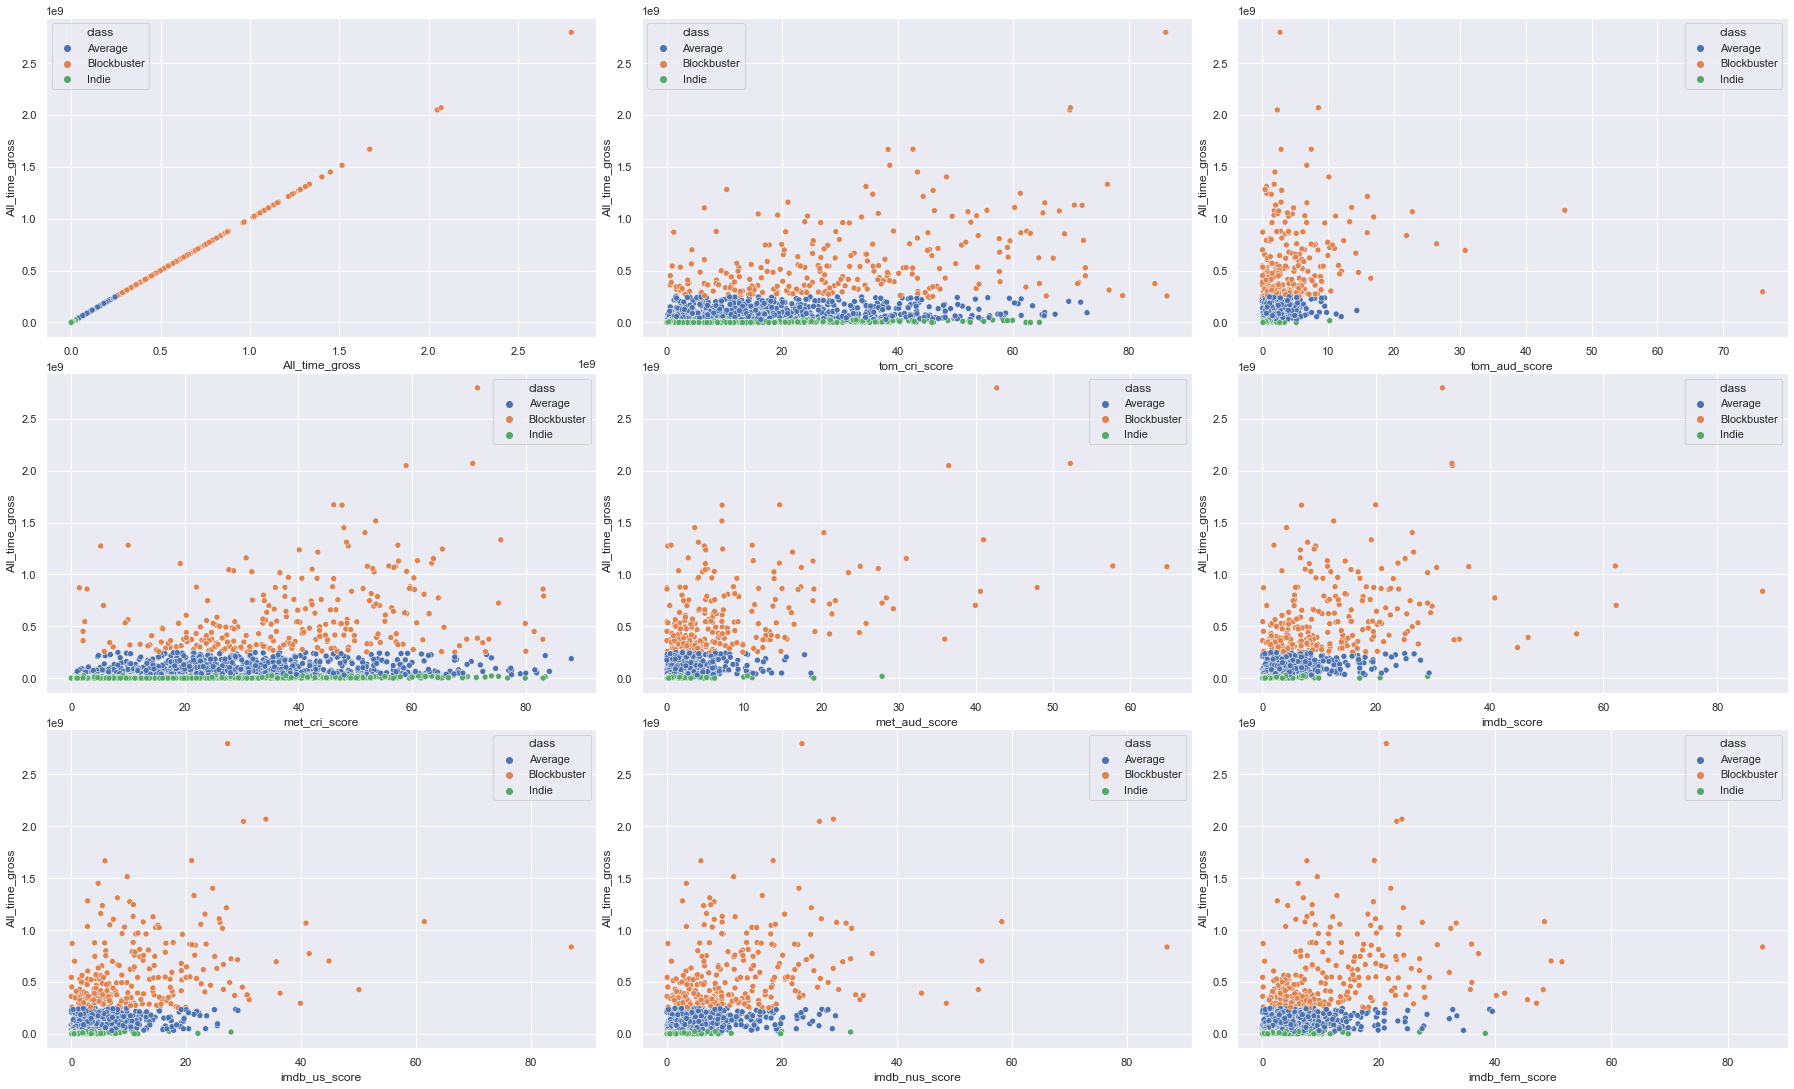

In [32]:
col = movie_score.columns
col.drop('class')
fig, axes = plt.subplots(3,3, figsize=(25,15))
fig.tight_layout()
for i, ax in zip(col, axes.flat):
         _ = sns.scatterplot(ax=ax,x=i,y= 'All_time_gross',data=movie_score,hue='class')

The diffrence between critic and audience vote distribution also evident in the scores. 

Let's do a pairplot to see the __relation between the scores.__

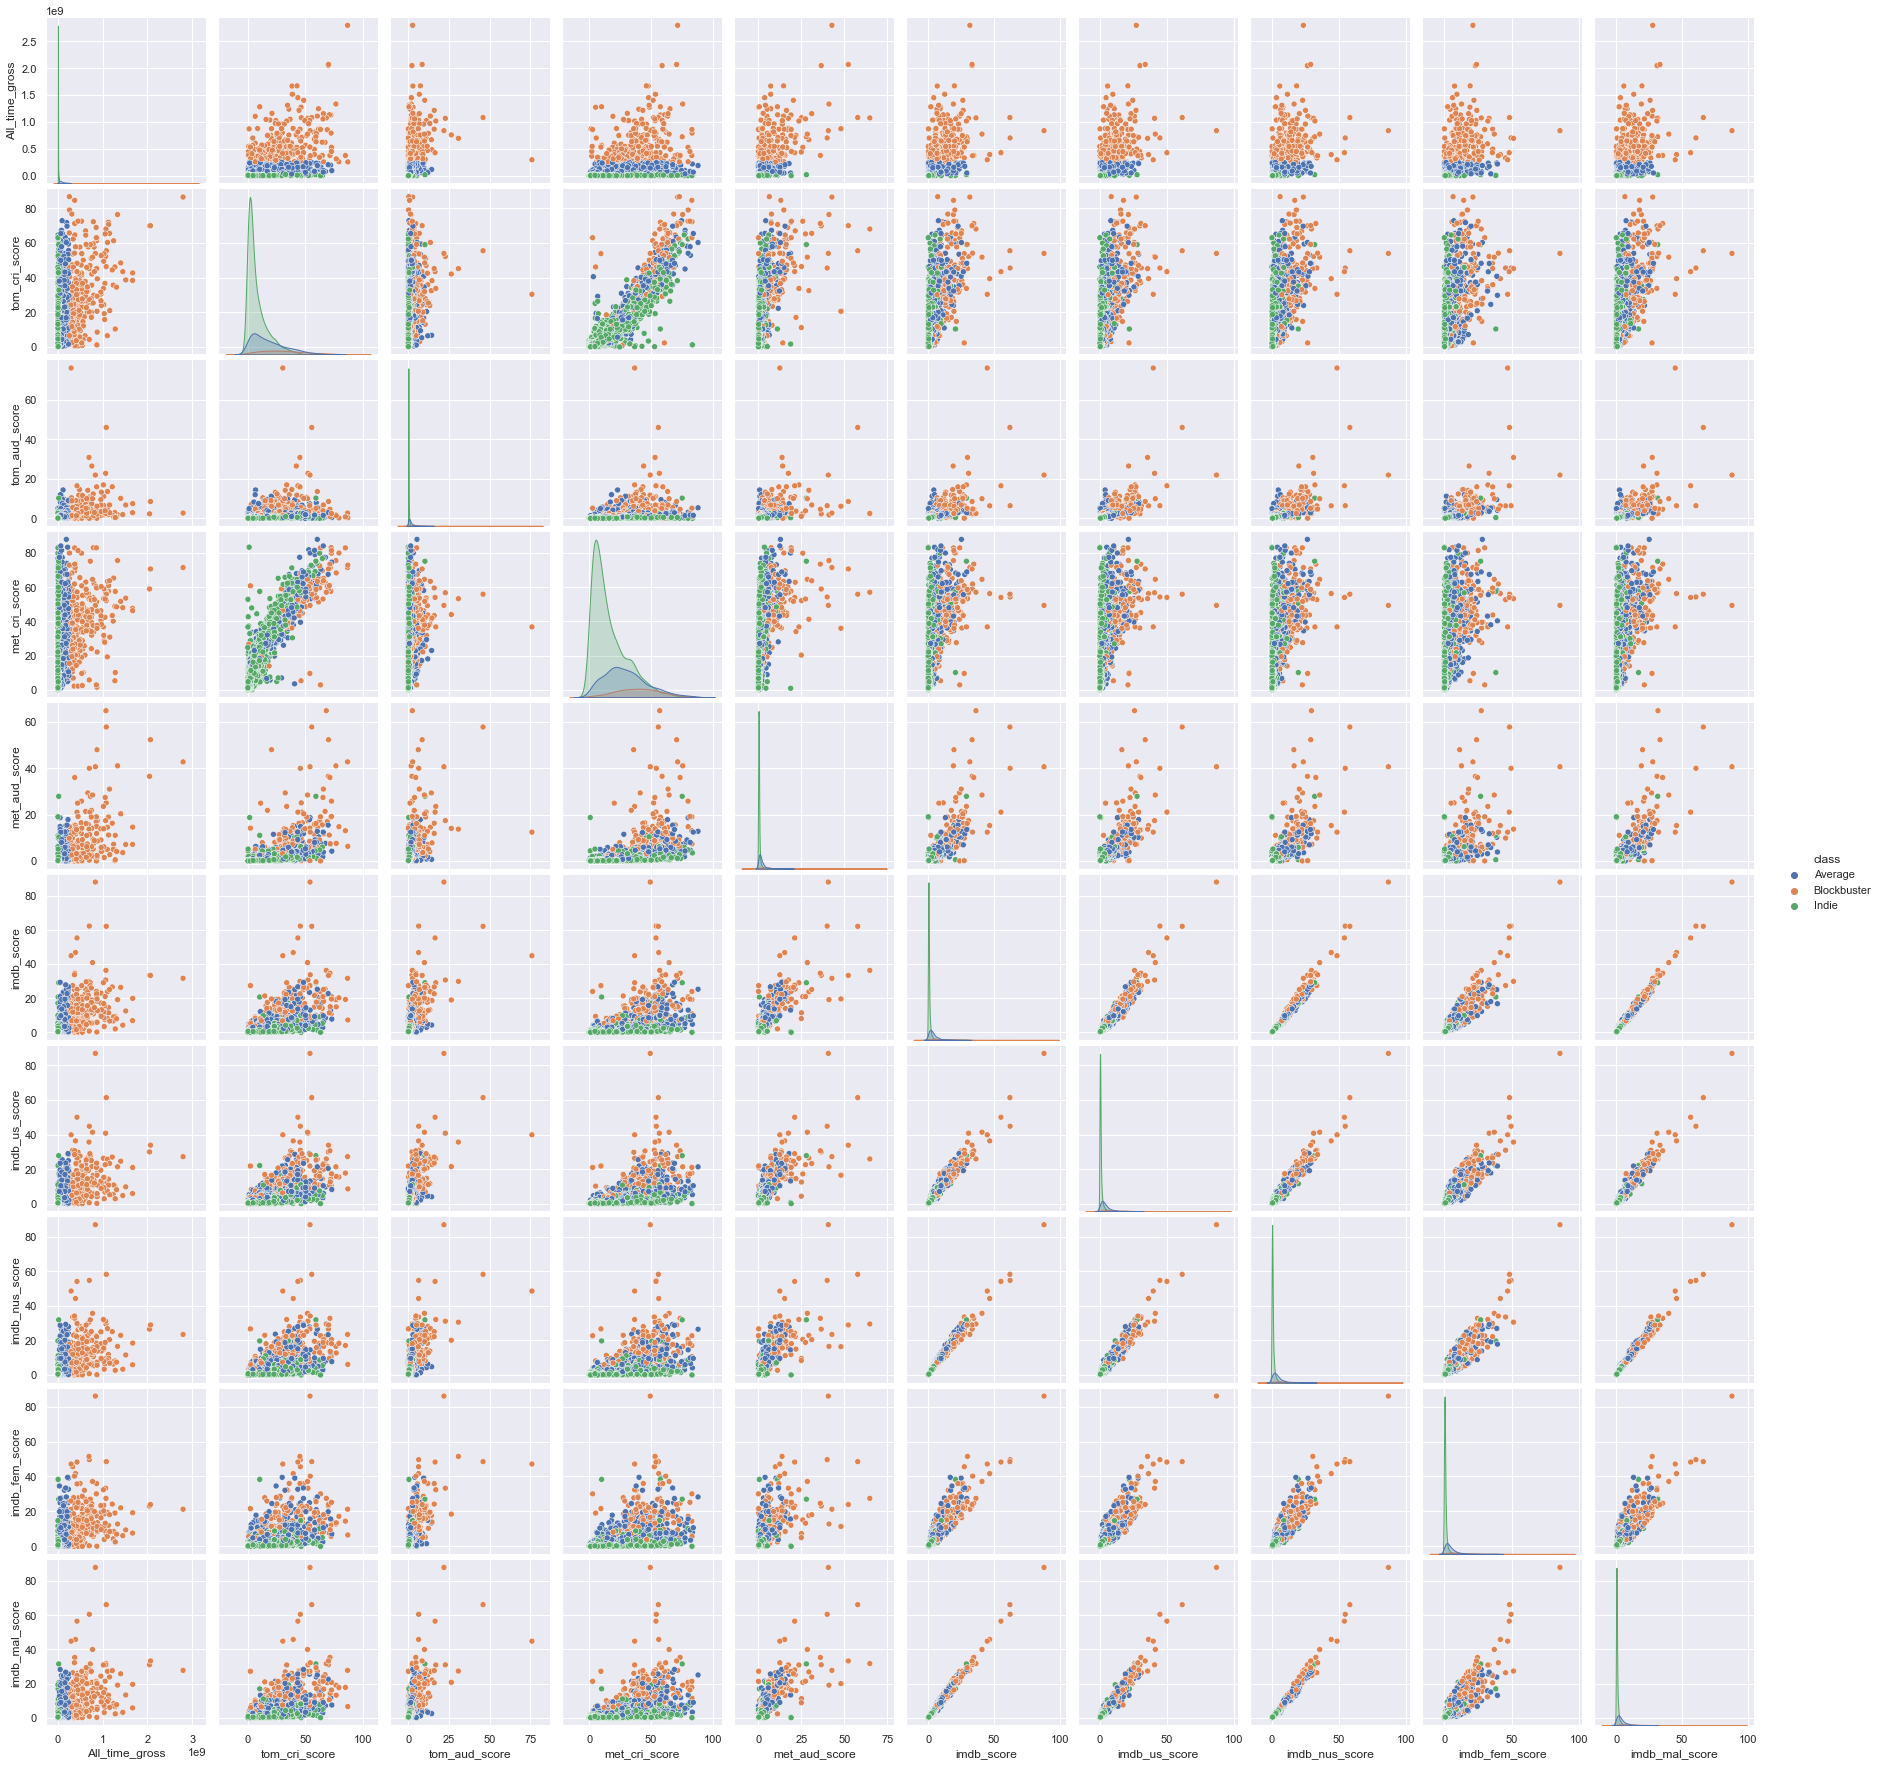

In [33]:
_ = sns.pairplot(data=movie_score,hue='class')

What is really evidence is the diffrent scores that gathered from imdb website have a very linear relation togeter. If we look at the main score which is imdb_score column and compare it to imdb_male,imdb_nus there is almost a perfet linear line. It might be better to drop these two columns.

In [34]:
movie_score = movie_score.drop(columns=['imdb_mal_score','imdb_nus_score'])

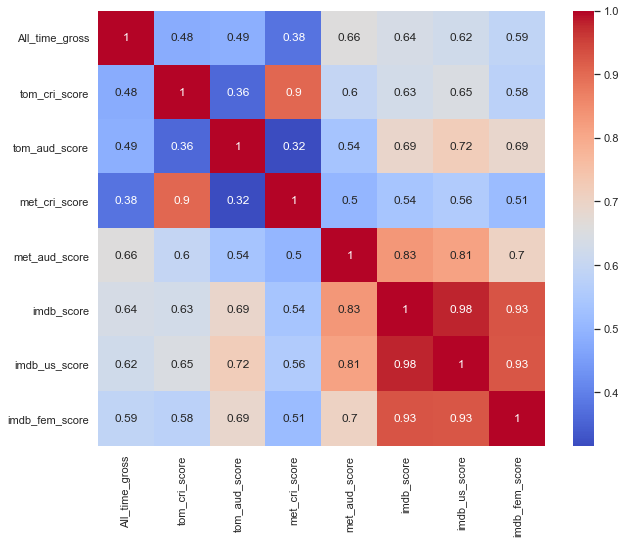

In [35]:
_ = sns.heatmap(movie_score.corr(),cmap='coolwarm', annot=True)

In [36]:
movie_score.to_csv('/Users/Amin/Documents/GitHub/Movie_boxoffice_reviews/data/processed/pre_process_score.csv',index=False)

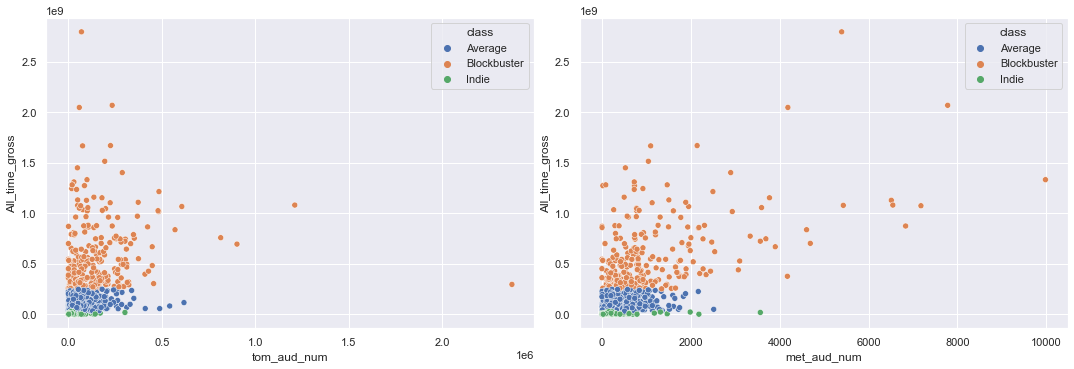

In [38]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.tight_layout()
_ = sns.scatterplot(ax=axes[0],x='tom_aud_num',y= 'All_time_gross',data=movie,hue='class')
_ = sns.scatterplot(ax=axes[1],x='met_aud_num',y= 'All_time_gross',data=movie,hue='class')
